In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("D:\\Data science\\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df1=df.rename({'Salary':'salary','YearsExperience':'Years_Experience'},axis=1)
df1

,Years_Experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df[df.values==0.0]


,YearsExperience,Salary


In [7]:
df.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [8]:
df[df.duplicated()].shape


(0, 2)

In [9]:
df[df.duplicated()]


,YearsExperience,Salary


In [10]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

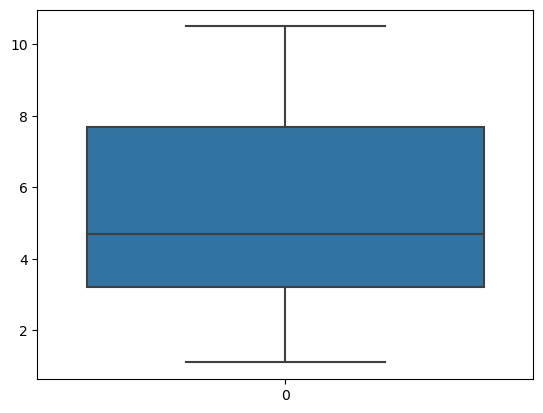

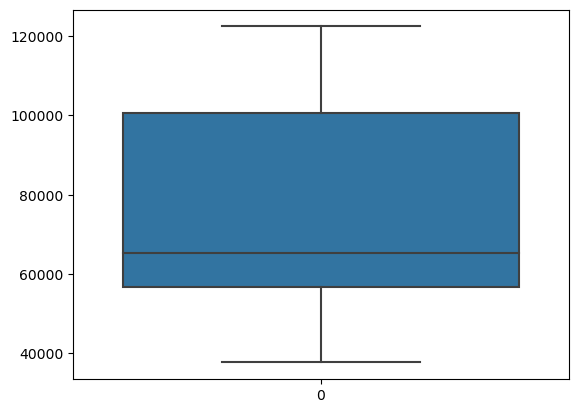

In [11]:
sns.boxplot(df['YearsExperience'])
plt.show()
sns.boxplot(df['Salary'])
plt.show()

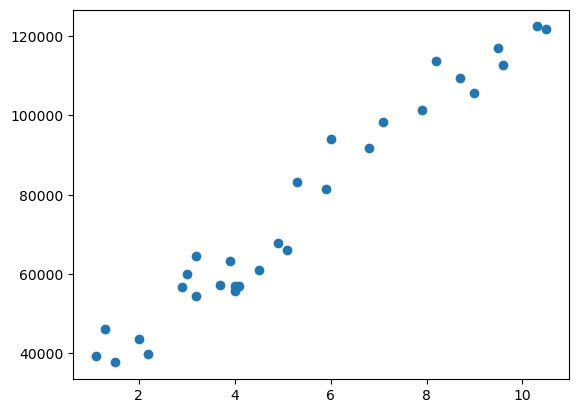

In [12]:
#scatter plot
plt.scatter(df['YearsExperience'],df['Salary'])
plt.show()

<Axes: >

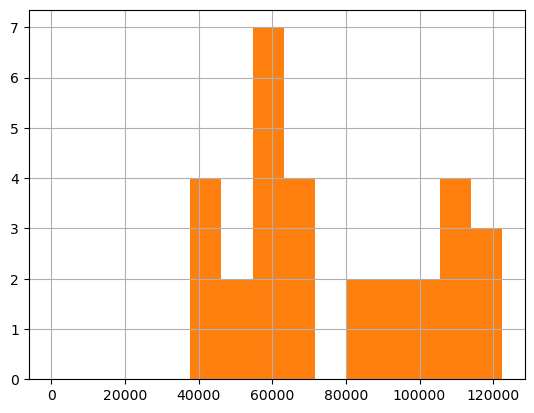

In [13]:
#histogram
df['YearsExperience'].hist()
df['Salary'].hist()

In [14]:
#calculating correlation
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


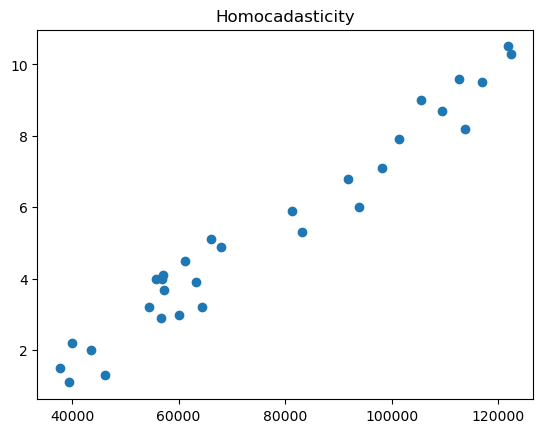

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['Salary'],df['YearsExperience'])
plt.title('Homocadasticity')
plt.show()

Text(0.5, 1.0, 'after transformation')

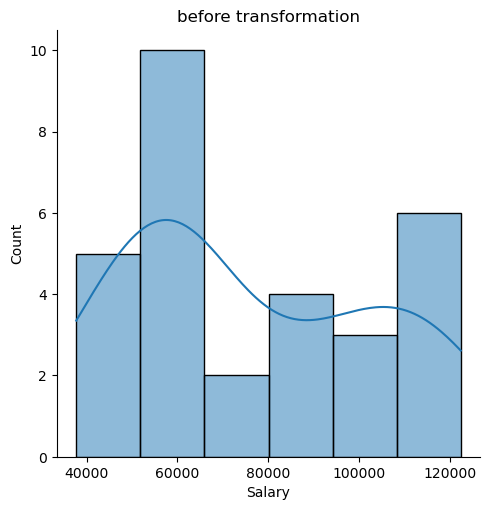

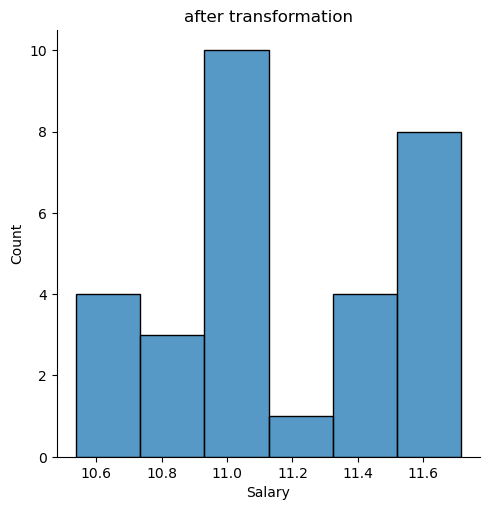

In [16]:
#for salary applying transformaton
sns.displot(df['Salary'],bins=6,kde=True)
plt.title('before transformation')
sns.displot(np.log(df['Salary']))
plt.title('after transformation')

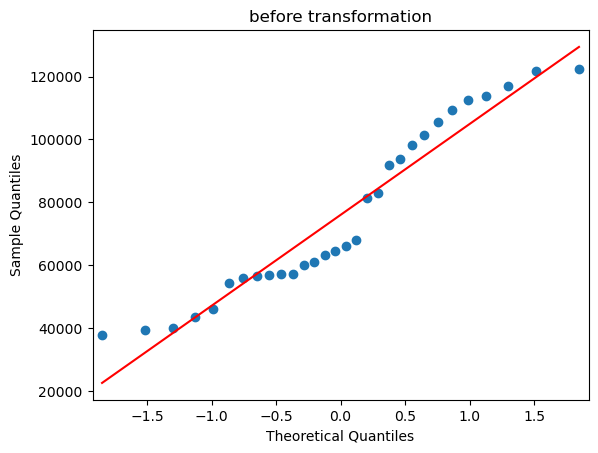

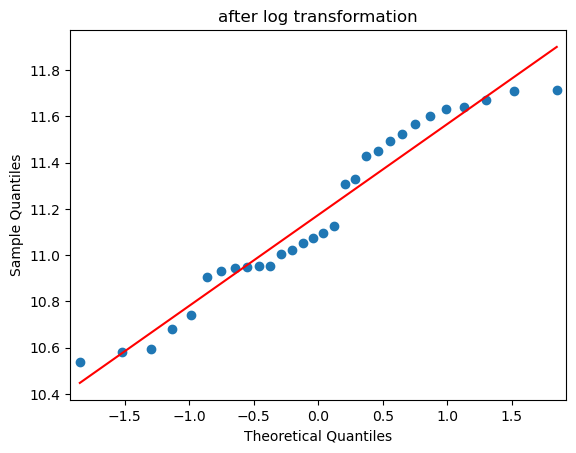

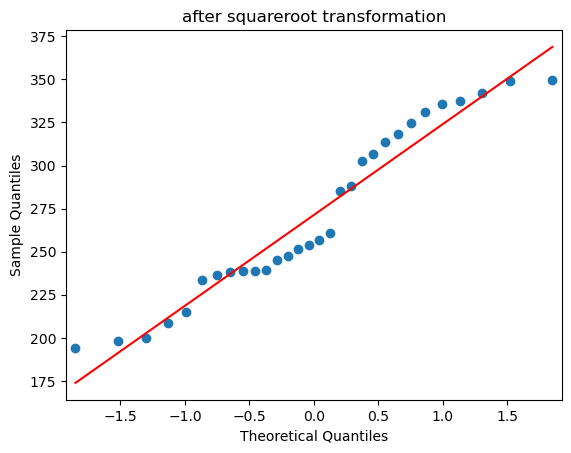

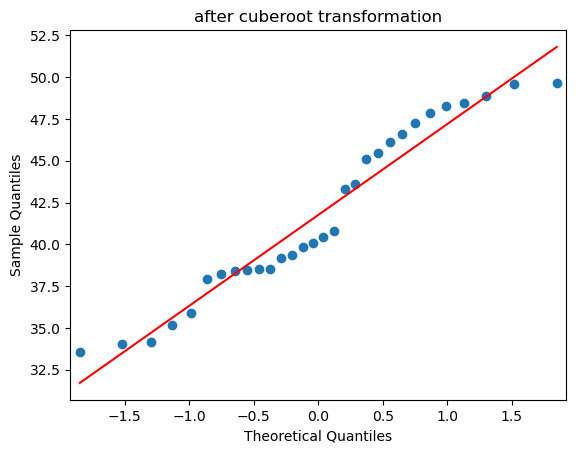

In [17]:
import statsmodels.formula.api as smf
import statsmodels.api as smf
smf.qqplot(df['Salary'],line='r')
plt.title('before transformation')
smf.qqplot(np.log(df['Salary']),line='r')
plt.title('after log transformation')
smf.qqplot(np.sqrt(df['Salary']),line='r')
plt.title('after squareroot transformation')
smf.qqplot(np.cbrt(df['Salary']),line='r')
plt.title('after cuberoot transformation')
plt.show()

Text(0.5, 1.0, 'after transformation')

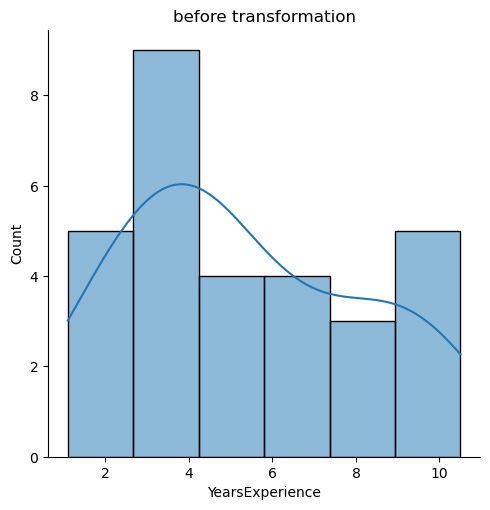

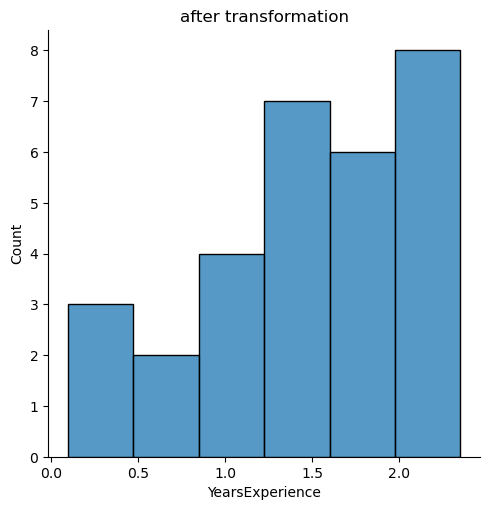

In [18]:
#for yers experience

sns.displot(df['YearsExperience'],bins=6,kde=True)
plt.title('before transformation')
sns.displot(np.log(df['YearsExperience']))
plt.title('after transformation')

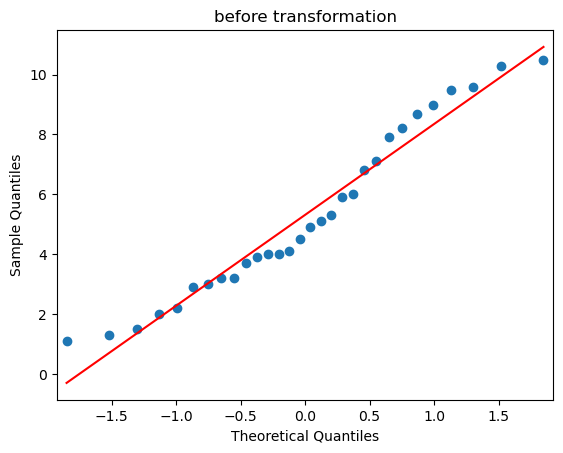

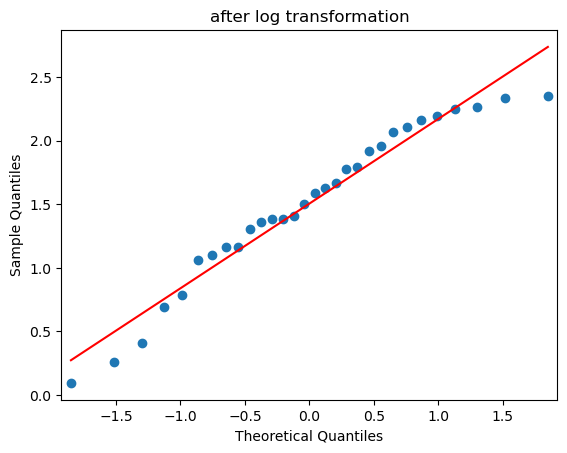

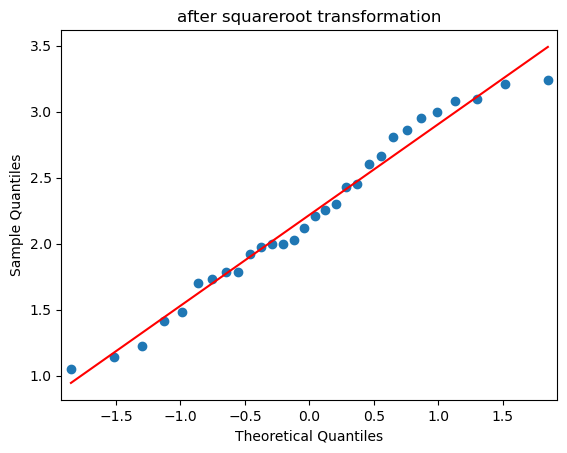

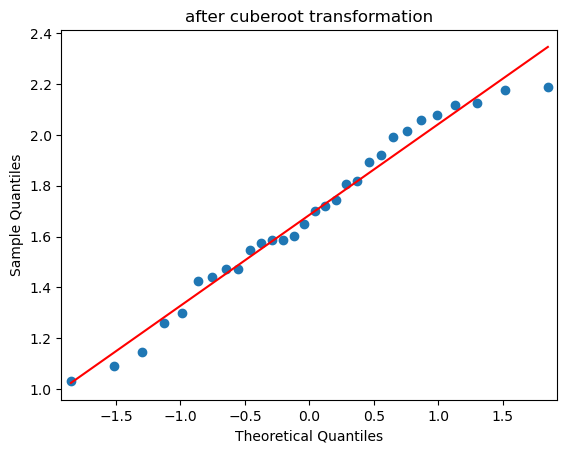

In [19]:
import statsmodels.api as smf
smf.qqplot(df['YearsExperience'],line='r')
plt.title('before transformation')
smf.qqplot(np.log(df['YearsExperience']),line='r')
plt.title('after log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']),line='r')
plt.title('after squareroot transformation')
smf.qqplot(np.cbrt(df['YearsExperience']),line='r')
plt.title('after cuberoot transformation')
plt.show()


In [20]:
#model fitting
import statsmodels.formula.api as sm
model=sm.ols('salary~Years_Experience', data = df1).fit()
model.summary()
square_root=sm.ols('np.sqrt(salary)~np.sqrt(Years_Experience)',data=df1).fit()
square_root.summary()
cube_model=sm.ols('np.cbrt(salary)~np.cbrt(Years_Experience)',data=df1).fit()
cube_model.summary()
log_model=sm.ols('np.log(salary)~np.log(Years_Experience)',data=df1).fit()
log_model.summary()
model.params

Intercept           25792.200199
Years_Experience     9449.962321
dtype: float64

In [21]:
print(model.tvalues,'/n',model.pvalues)


Intercept           11.346940
Years_Experience    24.950094
dtype: float64 /n Intercept           5.511950e-12
Years_Experience    1.143068e-20
dtype: float64


In [22]:
predicted1=pd.DataFrame()
predicted2=pd.DataFrame()
predicted1['Years_Experience']=df1.Years_Experience
predicted2['salary']=df1.salary
predicted2['predicted_delivery_time']=pd.DataFrame(model.predict(predicted1.Years_Experience))
predicted2


,salary,predicted_delivery_time
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788
